# Demographic Research with the Facebook Marketing API

# Outline

1. Using Python in the terminal
2. Install pySocialWatcher
3. Import modules
4. Register for Facebook Marketing API access
5. Explore pySocialWatcher module
6. Use pySocialWatcher to analyze a specific behavior (new movers)
7. Plot total new movers in subset dataframe

## Using Python in the terminal
- open the terminal in Mac by pressing the spacebar and command to open spotlight
    * type terminal in the spotlight search
to open the terminal 
- navigate to the directory that you downloaded or cloned the workshop to with `cd`
    * e.g. `cd tutorials/paa_2017_social_media` will change to the paa_2017_social_media folder within the tutorials directory
- open a jupyter notebook web browser with the command `jupyter notebook`

## Install pySocialWatcher
- **pySocialWatcher is currently only compatible with Python2.7**
    * if you downloaded Anaconda for Python3.x you can create a conda environment with Python2.7
        * first type `conda create -n py27 python=2.7` in the terminal to create a Python2.7 environment named py27
        * then type `source activate py27` to activate the py27 environment 
    * setup notebook in py27 environment
        * `conda install notebook ipykernel matplotlib`
        * `ipython kernel install --user`
* install pySocialWatcher with the following commands in your terminal
    * first, navigate into the pySocialWatcher in the Estimate_Facebook_Audience folder
    * then, type the following two commands in the terminal
~~~
pip install -r requirements.txt
python setup.py install
~~~
* pySocialWatcher [examples and documentation](https://github.com/maraujo/pySocialWatcher)
* [quick tutorial](https://goo.gl/WzE9ic) on pySocialWatcher module

## Import modules
* `import` is a Python module
* gives the current namespace access to the code in another module by the process of importing it
* equavialent to library(package) in R
* [import documentation](https://docs.python.org/2/tutorial/modules.html)

### import features
* import specific functions from a module
    * example: `from collections import OrderedDict`
* create an alias for a module names by using "as"
    * example: `import pandas as pd` imports the pandas module but assigns this module the name "pd" in the namespace
    * alias allows quicker access to functions:
        * example: instead of using `pandas.read_csv()` to read a .csv file can now type `pd.read_csv()`
* use `import` to import custom code/functions from a Python .py file in the current directory
    * example: `from utils import *`
    * utils.py is a script with two functions for this module

In [1]:
# uncomment the line below to view the functions in utils.py
#% cat utils.py

In [2]:
import os 
import re
import sys
import csv
import json 
import glob
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from collections import OrderedDict
from pysocialwatcher import watcherAPI 
from utils import * 
% matplotlib inline

### module documentation ###
* standard library modules:
    * [os](https://docs.python.org/2.7/library/os.html)
    * [re](https://docs.python.org/2.7/library/re.html)
    * [csv](https://docs.python.org/2.7/library/csv.html)
    * [sys](https://docs.python.org/2.7/library/sys.html)
    * [json](https://docs.python.org/2.7/library/json.html)
    * [glob](https://docs.python.org/2.7/library/glob.html)
    * [datetime](https://docs.python.org/2.7/library/datetime.html)
    * [collections](https://docs.python.org/2.7/library/collections.html)
* open source modules:
    * [numpy](http://www.numpy.org/)
    * [pandas](http://pandas.pydata.org)
    * [matplotlib](http://matplotlib.org/)
    * [pySocialWatcher](https://github.com/maraujo/pySocialWatcher)

### Python classes and functions
- modules allow for the creation of object classes and specific functions
- a class is an object that has certain features
    * [class documentation](https://docs.python.org/2.7/tutorial/classes.html)
- using a function within a Python module
    * functions within a module are accessed by typing the name for the module in the namespace and then a period (.)
        * example: view current working directory (function) within the os module
        * `os.getcwd()`
        * similar to `getwd()` in R

In [ ]:
os.getcwd()

## Register for Facebook Marketing API access: 
* Go to https://developers.facebook.com/apps/
* Click "Get Started" in the top right
* Create a new app by clicking on "+ Add a New App" and follow the process minimally 
* In the app's dashboard page, click "+ Add product" in the toolbar on the left
* Select "Marketing" Product Setup
* Click "Get Access Token"
* Click "Extend Access Token" button (at the bottom) (the button may not show up right away, just refresh the page)
    * The access token that shows up under the form is the one you want! It will look something like this:
    EAAHMonBrQ5kBALhYvCnLRsNRyO9YJH8I6ZBKwby5cLrS4V2GZAC2GT2MbDHXjpwnfvkPB0ZBv7knZAP1wRzKQVZAxd7fAsQTDAVrE0H3hUffFZBuRlncX0cAMVj8sIKLN68U6BxDAogvIdluX8tAMK

* Finally, you want to get your Ads Manager Account ID.
* Go to https://www.facebook.com/business/ and click "Create Advert"
* In URL, copy the part starting with act= such as:
https://www.facebook.com/ads/manager/creation/creation/?act=952863473440&pid=p1
### Create facebook_credentials.csv
* change directory to the credentials folder
    * create a .csv file named "facebook_credentials.csv"
    * paste your Facebook Access Token in the first row, first column
    * paste your Ads Manager Account ID in the first row, second column

### Load Facebook credentials
- `watcherAPI()` is a class within the pySocialWathcer module that makes requests with the Facebook Marketing API
    * `watcherAPI()` has multiple attributes including credentials
- `load_credentials_file` is a function within the watcher class that allows users to upload a .csv of Facebook Marketing API credentials
 - `check_tokens_account_valid` is a function that sends a generic example request to the Facebook Marketing API to assess the validity of the credentials loaded from the `load_credentials_file` function

In [3]:
watcher = watcherAPI() 
watcher.load_credentials_file("../credentials/facebook_credentials.csv")
watcher.check_tokens_account_valid()

2017-04-26 12:35:30 Kivans-MacBook-Pro.local root[7249] INFO Testing tokens and account number
2017-04-26 12:35:30 Kivans-MacBook-Pro.local root[7249] INFO 	Sending in request: {"genders": [0], "geo_locations": {"regions": [{"key": "3843"}], "location_types": ["home"]}}
2017-04-26 12:35:30 Kivans-MacBook-Pro.local requests.packages.urllib3.connectionpool[7249] INFO Starting new HTTPS connection (1): graph.facebook.com
2017-04-26 12:35:31 Kivans-MacBook-Pro.local root[7249] INFO All tokens and respective account number are valid.


### Explore pySocialWatcher module
- Can gather demographic and event parameters available on the Marketing API
    * [Demographic and event targeting parameters](https://developers.facebook.com/docs/marketing-api/targeting-specs/v2.9)
- **ALL** search parameters, such as city name must map to a (numeric) key value known the the Marketing API
- `print_geo_locations_given_query_and_location_type`
    * function to search for Facebook key of cities by name
        * e.g. search for cities that have "new" in their name 

In [ ]:
watcherAPI.print_geo_locations_given_query_and_location_type("new", ["city"])

In [4]:
watcher.print_bad_joke()

I used to think the brain was the most important organ.
Then I thought, look what’s telling me that.


### view available "behaviors" parameters
- can segment demographic groups by multiple parameters including "behaviors"

In [ ]:
watcher.print_behaviors_list()

- read in a .csv file with pandas module's `read_table` function
    * converts a .csv file into a dataframe
- this .csv contains all 50 US states and their correspond Facebook Marketin API location key (FB_key)

In [5]:
US_states = pd.read_table("../data/US_states.csv", sep = ",", header=0)
US_states.head()

,Abbreviation,State Name,FB_key
0,AL,Alabama,3843
1,AK,Alaska,3844
2,AZ,Arizona,3845
3,AR,Arkansas,3846
4,CA,California,3847


### View an entire row in a dataframe

In [6]:
US_states.iloc[12]

Abbreviation          IL
State Name      Illinois
FB_key              3856
Name: 12, dtype: object

### Making API request with pySocialWatcher
- watcher class has a `run_data_collection` function
- `run_data_collection` takes a .json file as an input and creates an API request
- output from `run_data_collection` is a pandas dataframe and .csv files

#### creating .json input files
- the following code creates a dictionary and saves a .json file ("IL_example.json") in the data folder
- we can convert Python dictionaries into .json files for the `run_data_collection` function

In [7]:
illinois_dic={"name": "IL_example",  "geo_locations": [{"name": "regions",
                                                           "values": [{"key":str(US_states["FB_key"][12])}],
                                                          "location_types": ["home"]}],
          "genders": [0,1,2],
          "ages_ranges": [{"min":13, "max":65}]}

illinois_dic_ordered = OrderedDict(sorted(illinois_dic.items(),key=lambda t: len(t[0])))
illinois_dic_json=json.dumps(illinois_dic_ordered, indent = 4)
print illinois_dic_json

file_name = "IL_example.json"

with open('../data/%s' % file_name, 'w') as outfile:
    outfile.write(json.dumps(illinois_dic_ordered, indent = 4))

{
    "name": "IL_example", 
    "genders": [
        0, 
        1, 
        2
    ], 
    "ages_ranges": [
        {
            "max": 65, 
            "min": 13
        }
    ], 
    "geo_locations": [
        {
            "values": [
                {
                    "key": "3856"
                }
            ], 
            "name": "regions", 
            "location_types": [
                "home"
            ]
        }
    ]
}


make a request to the Marketing API with the example dictionary created above

In [ ]:
watcher.run_data_collection("../data/%s" % file_name)

## Use pySocialWatcher to analyze a specific behavior
### get data on new movers
6029662272682 | This Life Event segment contains consumers who are likely to be new movers in the last 6 months.| New mover 

- the following code creates a new dictionary that incorporates (new mover) behavior and saves a .json file ("IL_example_new_movers.json") in the data folder

In [ ]:
illinois_dic_new_movers={"name": "IL_example",  "geo_locations": [{"name": "regions",
                                                           "values": [{"key":str(US_states["FB_key"][12])}],
                                                          "location_types": ["home"]}],
          "genders": [0,1,2],
          "ages_ranges": [{"min":13, "max":65}],
          "behavior":[{"or": [6029662272682],"name": "new_mover"}]}

illinois_dic_new_movers_ordered = OrderedDict(sorted(illinois_dic_new_movers.items(),key=lambda t: len(t[0])))
illinois_dic_new_movers_json=json.dumps(illinois_dic_new_movers_ordered, indent = 4)
print illinois_dic_new_movers_json

file_name = "IL_example_new_movers.json"

with open('../data/%s' % file_name, 'w') as outfile:
    outfile.write(json.dumps(illinois_dic_new_movers_ordered, indent = 4))

make a request to the Marketing API with the new movers dictionary created above

In [ ]:
watcher.run_data_collection("../data/%s" % file_name)

## Comparing states
- use pandas to subset US_states dataframe

In [8]:
state_subset = US_states.loc[US_states['Abbreviation'].isin(["CA","NY", "TX", "IL"])]
# reindex state_subset
state_subset.index = [0,1,2,3]
state_subset

,Abbreviation,State Name,FB_key
0,CA,California,3847
1,IL,Illinois,3856
2,NY,New York,3875
3,TX,Texas,3886


- loop through subset dataframe to create folders

In [ ]:
for state in range(0, len(state_subset["State Name"])):
    if not os.path.exists('../data/new_movers_by_state/%s' % state_subset["State Name"][state]):
        os.makedirs('../data/new_movers_by_state/%s' % state_subset["State Name"][state])

- create (UN) age groups, another parameter that can be iterated through during API requests

In [ ]:
UN_age_min = [13,15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
UN_age_max = [65,19, 24, 29, 34, 39, 44, 49, 54, 59, 65]
UN_age_table = {'age_min': UN_age_min, 'age_max': UN_age_max}
UN_age_table_df = pd.DataFrame(data=UN_age_table, index=None)
UN_age_table_df = UN_age_table_df[["age_min", "age_max"]]
UN_age_table_df.to_csv("../data/UN_age_table.csv", index=None)

- loop through each state in the subset dataframe and create .json files for estimating new movers

In [ ]:
ctr = 0
for state in range(0, len(state_subset["State Name"])):
    state_dic={"name": str(state_subset["State Name"][state])+"_new_movers",
               "geo_locations": [{"name": "regions", "values": [{"key":str(US_states["FB_key"][state])}],
                                                          "location_types": ["home"]}],
          "genders": [0,1,2],
          "ages_ranges": [{"min":13, "max":65}],
          "behavior":[{"or": [6029662272682],"name": "new_movers"}]}
    state_dic["geo_locations"][0]["values"][0]['key'] = str(state_subset["FB_key"][state])
    state_dic_ordered = OrderedDict(sorted(state_dic.items(),key=lambda t: len(t[0])))
    state_dic_json=json.dumps(state_dic_ordered, indent = 4)
    gender_dict = {'0':'female_male_total_pop'}
    file_name = str(state_subset["State Name"][state])+"_new_movers"+".json"
    state_folder = state_subset["State Name"][state]

    if not os.path.exists('../data/new_movers_by_state/%s/api_requests_json' % state_folder):
        os.makedirs('../data/new_movers_by_state/%s/api_requests_json' % state_folder)

    if not os.path.exists('../data/new_movers_by_state/%s/api_requests_csv' % state_folder):
        os.makedirs('../data/new_movers_by_state/%s/api_requests_csv' % state_folder)


    with open('../data/new_movers_by_state/%s/api_requests_json/%s' % (state_folder,file_name), 'w') as outfile:
        outfile.write(json.dumps(state_dic_ordered, indent = 4))

    state_api_request = watcher.run_data_collection('../data/new_movers_by_state/%s/api_requests_json/%s' % (state_folder,file_name))
    state_api_request
    state_api_request.insert(0, "state",state_subset["State Name"][state])
    csv_filename = file_name.split(".")[0]+".csv"
    state_api_request.to_csv("../data/new_movers_by_state/%s/api_requests_csv/%s" % (state_folder,csv_filename),
                        index=False) 

    ctr = ctr +1
    total =len(state_subset["State Name"])
    print("file %.f of %.f " % (ctr,total))
    print(file_name)



In [ ]:
%rm collect_finished_* dataframe_collecting_*  dataframe_skeleton_*

use `merge_subdirectories` function from utils to merge all folders directory of new movers by state into one .csv file

In [ ]:
merge_subdirectories('../data/new_movers_by_state/',
                     'raw_new_movers_data.csv')

read in merged .csv file of new movers by state

In [9]:
raw_new_movers_data = pd.read_csv("../data/raw_new_movers_data.csv")
raw_new_movers_data.head()

,state,name,ages_ranges,geo_locations,genders,interests,behavior,scholarities,languages,family_statuses,all_fields,targeting,response,audience
0,California,California_new_movers,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3847'}], u'name': u're...",0.0,NaN,"{u'or': [6029662272682], u'name': u'new_movers'}",NaN,NaN,NaN,"(('genders', 0), ('ages_ranges', {u'max': 65, ...",{'flexible_spec': [{'behaviors': [{'id': 60296...,"{""data"":{""users"":540000,""bid_estimations"":[{""u...",540000
1,California,California_new_movers,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3847'}], u'name': u're...",1.0,NaN,"{u'or': [6029662272682], u'name': u'new_movers'}",NaN,NaN,NaN,"(('genders', 1), ('ages_ranges', {u'max': 65, ...",{'flexible_spec': [{'behaviors': [{'id': 60296...,"{""data"":{""users"":240000,""bid_estimations"":[{""u...",240000
2,California,California_new_movers,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3847'}], u'name': u're...",2.0,NaN,"{u'or': [6029662272682], u'name': u'new_movers'}",NaN,NaN,NaN,"(('genders', 2), ('ages_ranges', {u'max': 65, ...",{'flexible_spec': [{'behaviors': [{'id': 60296...,"{""data"":{""users"":290000,""bid_estimations"":[{""u...",290000
3,Illinois,Illinois_new_movers,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3856'}], u'name': u're...",0.0,NaN,"{u'or': [6029662272682], u'name': u'new_movers'}",NaN,NaN,NaN,"(('genders', 0), ('ages_ranges', {u'max': 65, ...",{'flexible_spec': [{'behaviors': [{'id': 60296...,"{""data"":{""users"":220000,""bid_estimations"":[{""u...",220000
4,Illinois,Illinois_new_movers,"{u'max': 65, u'min': 13}","{u'values': [{u'key': u'3856'}], u'name': u're...",1.0,NaN,"{u'or': [6029662272682], u'name': u'new_movers'}",NaN,NaN,NaN,"(('genders', 1), ('ages_ranges', {u'max': 65, ...",{'flexible_spec': [{'behaviors': [{'id': 60296...,"{""data"":{""users"":97000,""bid_estimations"":[{""un...",97000


In [10]:
print("the data has %s rows and %s columns" % (raw_new_movers_data.shape[0], raw_new_movers_data.shape[1]))
print(raw_new_movers_data.dtypes)

the data has 12 rows and 14 columns
state               object
name                object
ages_ranges         object
geo_locations       object
genders            float64
interests          float64
behavior            object
scholarities       float64
languages          float64
family_statuses    float64
all_fields          object
targeting           object
response            object
audience             int64
dtype: object


use `process_facebook_data` function from utils to munge dataframe of merged movers

In [11]:
merged_new_movers_data = process_facebook_data(raw_new_movers_data)
merged_new_movers_data.head()

utils.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["behavior"] = df.loc[:, ("behavior")].apply(lambda x: re.findall(r'\d+',x))
utils.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["behavior"] = df.loc[:, ("behavior")].apply(lambda x: ''.join(x))
utils.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

,state,name,ages_ranges,genders,behavior,audience
0,California,California_new_movers,ages_13_65,total population,6029662272682,540000
1,California,California_new_movers,ages_13_65,female,6029662272682,240000
2,California,California_new_movers,ages_13_65,male,6029662272682,290000
3,Illinois,Illinois_new_movers,ages_13_65,total population,6029662272682,220000
4,Illinois,Illinois_new_movers,ages_13_65,female,6029662272682,97000


- use pandas `group_by` function to group data by a column

In [12]:
merged_new_movers_data_genders = merged_new_movers_data.groupby("genders")
merged_new_movers_data_genders["audience"].sum()

genders
female               627000
male                 780000
total population    1440000
Name: audience, dtype: int64

## Plot total new movers in subset dataframe
- create a new dataframe that is a the total population audience estimate of new movers for each state and the state name
- create a dataframe that is just the state population estimate
- create labels
- plot the population estimates and labels

In [13]:
new_movers_total_pop = merged_new_movers_data.loc[merged_new_movers_data["genders"]=="total population"][["state", "audience"]]
new_movers_total_pop 

,state,audience
0,California,540000
3,Illinois,220000
6,New York,240000
9,Texas,440000


In [14]:
new_movers_audience = new_movers_total_pop["audience"]
new_movers_audience

0    540000
3    220000
6    240000
9    440000
Name: audience, dtype: int64

In [15]:
labels = [i for i in state_subset["Abbreviation"]]
labels

['CA', 'IL', 'NY', 'TX']

In [16]:
new_movers_audience.mean()

360000.0

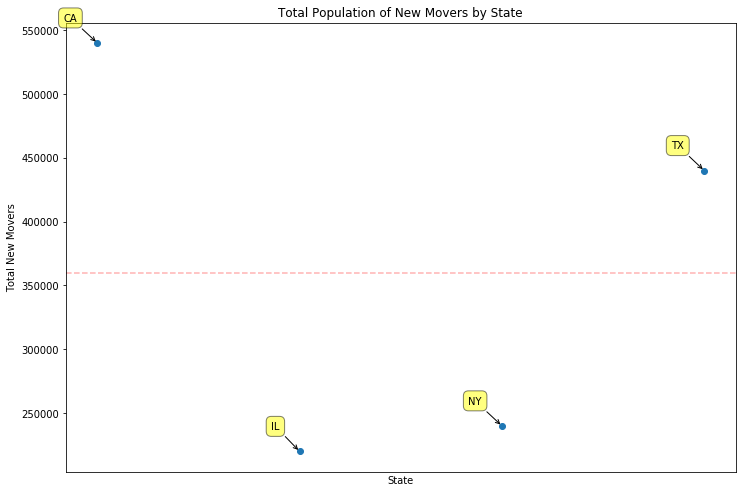

In [17]:
plt.subplots(1, figsize=(12, 8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(np.arange(len(new_movers_audience)), new_movers_audience)
for label, x, y in zip(labels,np.arange(len(new_movers_audience)), new_movers_audience):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.xticks([])

plt.axhline(new_movers_audience.mean(), linestyle='--', color='red', alpha=0.3)
plt.title("Total Population of New Movers by State")
plt.xlabel("State")
plt.ylabel("Total New Movers")

plt.show()

In [18]:
import matplotlib
print("System and module version information: \n")
print('Python version:', sys.version_info)
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('matplotlib version:', matplotlib.__version__)

System and module version information: 

('Python version:', sys.version_info(major=2, minor=7, micro=12, releaselevel='final', serial=0))
('numpy version:', '1.12.0')
('pandas version:', u'0.19.0')
('matplotlib version:', '2.0.0')
